# LASP REU Python Tutorial Day 2

## Imports

Remember the huge stack of science libraries (or the list of built-in libraries)?

So, how to get those?

With imports:

In [2]:
from math import pi
tau = 2*pi
print("The real circular constant is", tau)
# read tauday.com if you don't believe me. ;)

The real circular constant is 6.283185307179586


How to import other libraries, their functions or their values is very flexible.

One can distinguish mainly 2 kinds:
* One imports a function directly into the current `namespace`:
```python
from math import sin
```
* import the top module and access via the dot `.`:
```python
import math
print(math.sin(0.5))
```

In both cases one can rename the object being imported.

This is a very powerful feature of Python: You can do what you want in terms of how to call things up.

In [3]:
from math import sin as stupid_sine
print(stupid_sine(0.5))

0.479425538604203


In [4]:
import math as i_hate_math
print(i_hate_math.cos(-1))

0.5403023058681398


## Function returns, packing and unpacking

Functions can return values.

(you saw this in the last exercise already):

In [2]:
from math import log10

def mylog(value):
    if value < 0:
        return "Logarithm not defined."
    else:
        return log10(value)

In [4]:
result = mylog(-1)
result

'Logarithm not defined.'

In [6]:
import math
math.log10(-1)

ValueError: math domain error

Maybe you want to return more than one value?

Python will automatically pack things up:

In [7]:
from math import log10

def mylog(value):
    if value < 0:
        return "Logarithm not defined."
    else:
        return value, log10(value)

In [8]:
result = mylog(3)
result

(3, 0.47712125471966244)

In [9]:
print(type(result))
len(result)

<class 'tuple'>


2

Tuples are the immutable version of lists:

In [10]:
result[0] = 4

TypeError: 'tuple' object does not support item assignment

In [11]:
mylist = list(result)
mylist

[3, 0.47712125471966244]

In [13]:
mylist[0] = 5
mylist

[5, 0.47712125471966244]

and "iterable" as well (meaning I can loop over them):

In [16]:
for item in result:
    print(item)

3
0.47712125471966244


In [17]:
waves = [5000, 6000]

In [18]:
for wave in waves:
    print(wave)

5000
6000


In [14]:
d = {'a':5, 'b':6}
d

{'a': 5, 'b': 6}

In [15]:
for key,val in d.items():
    print(key, val)

b 6
a 5


Python will always automatically pack for you (as it did above with result), but will never
automatically unpack for you:

In [19]:
val, res = mylog(3)
print(val)
res

3


0.47712125471966244

Because of the automatic packing, you can always have less than required variables, but never more:

In [20]:
a, b, c = mylog(17)

ValueError: not enough values to unpack (expected 3, got 2)

In [21]:
out = mylog(17)

In [22]:
type(out)

tuple

In [23]:
out[0]

17

In [24]:
out[1]

1.2304489213782739

### Interlude: strings

They are also iterables:

In [25]:
for char in "Han":  # Remember that I decide on the name of my temporary variable
    print(char)

H
a
n


Strings have a lot of useful support functions (lingo: `methods`) inside them:

In [26]:
s = "Han shot first!"

In [27]:
s.center?

In [28]:
s.split()   # by default, spaces are assumed to be the separator

['Han', 'shot', 'first!']

In [29]:
s.split('s')  #  note that the separator can be anything, but it will be removed!

['Han ', 'hot fir', 't!']

Why are the methods already available when I did not store a string into a variable?

In [25]:
'{1}, I am your {0}.'.format('father', 'Luke')

'Luke, I am your father.'

Note, I am using the `format` method even so I haven't stored that string anywhere.

Now, even an empty string or a string with only a space has those methods, and one very useful is the 'join' method:

In [30]:
' '.join(["It's", 'a','trap!'])

"It's a trap!"

### Back to functions: Default values
Functions can have optional arguments that hold a default value:

In [31]:
def sub_reverser(alist, index=0):
    reversed_list = list(reversed(alist))
    return ''.join(reversed_list[index:])

In [33]:
''.join(list(reversed('astring')))

'gnirtsa'

In [34]:
sub_reverser('astring')

'gnirtsa'

In [35]:
sub_reverser('astring', 3)

'rtsa'

This is a very powerful design feature of Python as well: I only need to write one function, but can use it in very different ways, depending on my default arguments (also known as `keyword argument`).

Ok, let's go to some more meaty science libraries.

## matplotlib gallery

* Can't go into depth of matplotlib library here, very rich and powerful
* Best way to learn: Go to their gallery page http://matplotlib.org/gallery.html

In [36]:
from IPython.display import IFrame
IFrame("http://matplotlib.org/gallery.html", width=800, height=350)

## numpy

For any serious array/vector/matrix based math, you should use the numpy library.

It is faster, because in contrast to lists, it insists on keeping every item the same data-type. This enables under the hood to create C-objects and pass them to the C or Fortran math libraries.

These libraries are decade old standards with very well researched behaviour!

Contrary to the above mentioned freedom for importing, there are some standards that you should just adapt if you don't want to confuse yourself, when searching for tutorials, blogs etc. to help you out.

This standard imports are:

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Okay, let's do some math:

In [39]:
mylist = list(range(10))
mylist

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [40]:
arr = np.array(mylist)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Most import feature of numpy arrays is to support vector math, which lists can't do:

In [41]:
mylist / 3

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [42]:
arr / 3

array([ 0.        ,  0.33333333,  0.66666667,  1.        ,  1.33333333,
        1.66666667,  2.        ,  2.33333333,  2.66666667,  3.        ])

Lingo: `Lists` are Python lists, `arrays` are numpy arrays.

Basic indexing works the same:

In [43]:
mylist[2:4]

[2, 3]

In [44]:
arr[2:4]

array([2, 3])

numpy has it's own range function: `arange()` (standing for array-range):

In [46]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
np.arange?

In [49]:
arr = np.arange(1, 11, 2, dtype='float')  # works the same as range, but also type-able

In [50]:
arr.dtype

dtype('float64')

Handy array creators:

In [51]:
np.ones(3)

array([ 1.,  1.,  1.])

In [52]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

Multi-dimensional:

In [53]:
np.ones((2,3))  # rows first, then columns

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

Note that the `ones` function wants the dimensions as a tuple if more than 1, to not confuse things with other arguments.

Here's 3D:

In [54]:
np.zeros((2,4,3))  # the depth dimension (how many 2D arrays) first!

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]])

Lot's of methods inside the numpy array object:

In [55]:
arr.

SyntaxError: invalid syntax (<ipython-input-55-25a33d75fd04>, line 1)

Most useful:

In [56]:
arr.mean()

5.0

In [57]:
arr.std()

2.8284271247461903

In [58]:
arr.dot(arr)

165.0

In [59]:
np.ones((3,3)).diagonal()

array([ 1.,  1.,  1.])

In [60]:
arr.max()

9.0

In [61]:
arr.argmax()  # WHERE is the max?

4

Lazy indexing one of most important functionality:

In [63]:
arr

array([ 1.,  3.,  5.,  7.,  9.])

In [64]:
arr < 3

array([ True, False, False, False, False], dtype=bool)

In [65]:
arr[arr<3]

array([ 1.])

2D numpy (= matrices) have a lot of matrix features:

In [66]:
arr2d = np.random.randn(2,3)  # randn provides Gaussian-distributed random values.
arr2d

array([[ 0.10057945,  0.06079022,  0.34149928],
       [ 0.46686287, -0.59692558, -0.59996842]])

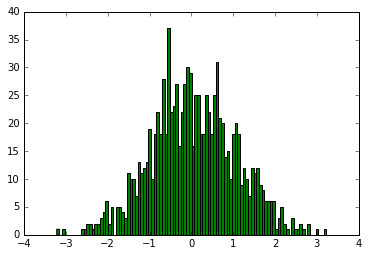

In [67]:
%matplotlib inline

plt.hist(np.random.randn(1000), bins=100, color='green');

In [69]:
arr2d

array([[ 0.10057945,  0.06079022,  0.34149928],
       [ 0.46686287, -0.59692558, -0.59996842]])

In [70]:
arr2d.transpose()

array([[ 0.10057945,  0.46686287],
       [ 0.06079022, -0.59692558],
       [ 0.34149928, -0.59996842]])

Absolutely impossible to cover `numpy` even half here, but it's one of the most important tools in Python.

## pandas

Most important high-level data analysis library (in my POV).

It uses `numpy` under the hood.

So, my recommendation: 
1. Learn the numpy basics, don't try to get it all in, hardly possible.
 * For example the scipy quickstart tutorial
2. Learn Pandas first, and whenever they refer to an unknown numpy feature, look that up.

Pandas has a nice 10 minutes intro here: http://pandas.pydata.org/pandas-docs/stable/10min.html

Most important objects in `pandas` are Series and DataFrames

In [72]:
import pandas as pd

s = pd.Series(np.arange(10)*24.1)
s

0      0.0
1     24.1
2     48.2
3     72.3
4     96.4
5    120.5
6    144.6
7    168.7
8    192.8
9    216.9
dtype: float64

Important concept in `pandas` are the indexes. `pandas` always keeps the relationship between indices and data intact!

series filtering works the same as for numpy arrays, as it's build on it:

In [73]:
s[s<100]

0     0.0
1    24.1
2    48.2
3    72.3
4    96.4
dtype: float64

DataFrames are the 2D version of Series, complete with column names.

Another very enticing feature of `pandas` are its datetime abilities:

In [75]:
dates = pd.date_range('20130101', periods=10)

print(dates)
df = pd.DataFrame(np.random.randn(10,4), index=dates, columns=list('ABCD'))
df

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2013-01-01,-0.385683,-0.447271,-1.056506,-0.449031
2013-01-02,0.180882,-0.527830,0.495707,0.448709
2013-01-03,-0.691885,1.029479,1.651550,0.669449
2013-01-04,-0.567650,-0.854710,-0.856430,-0.458681
2013-01-05,-0.423667,-0.812838,-1.590655,1.112229
2013-01-06,0.104276,0.815805,-0.057856,-0.584672
2013-01-07,0.849349,-0.067153,-1.144254,-1.138004
2013-01-08,1.110839,0.349981,-0.982446,-0.533032
2013-01-09,1.145089,-0.058981,-0.019504,0.458360
2013-01-10,-0.848392,1.353922,1.336653,-1.627830


In [81]:
df.loc['2013-01-01','A':'C']

A   -0.385683
B   -0.447271
C   -1.056506
Name: 2013-01-01 00:00:00, dtype: float64

Coolest part is the automatic datetime and multi-graph plotting of DataFrames:

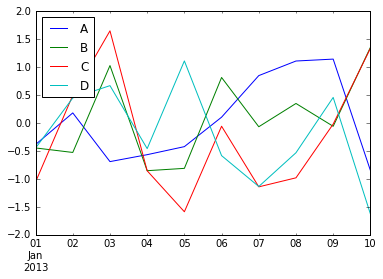

In [82]:
df.plot()

It is using `matplotlib` under the hood, so you could do this yourself, but with much more code.

In [85]:
df.head()

,A,B,C,D
2013-01-01,-0.385683,-0.447271,-1.056506,-0.449031
2013-01-02,0.180882,-0.527830,0.495707,0.448709
2013-01-03,-0.691885,1.029479,1.651550,0.669449
2013-01-04,-0.567650,-0.854710,-0.856430,-0.458681
2013-01-05,-0.423667,-0.812838,-1.590655,1.112229


In [86]:
df.tail(3)

,A,B,C,D
2013-01-08,1.110839,0.349981,-0.982446,-0.533032
2013-01-09,1.145089,-0.058981,-0.019504,0.458360
2013-01-10,-0.848392,1.353922,1.336653,-1.627830


In [87]:
df.loc['2013-01-4':'2013-01-09', 'B':'C']

,B,C
2013-01-04,-0.854710,-0.856430
2013-01-05,-0.812838,-1.590655
2013-01-06,0.815805,-0.057856
2013-01-07,-0.067153,-1.144254
2013-01-08,0.349981,-0.982446
2013-01-09,-0.058981,-0.019504


Above, using the `.loc` attribute of dataframes, this is the fully official way to select data in a dataframe in all possible ways. The first part will always filter the rows you want, the second part always on the columns.

But if you only want to filter/select on your current index, one can put these conditions directly like an indexing choice into brackets `[]`:

In [67]:
df['2013-01-4':'2013-01-09']

,A,B,C,D
2013-01-04,-0.857795,-0.364065,-0.736198,0.992085
2013-01-05,0.507128,0.701756,-0.222728,1.348895
2013-01-06,-0.133285,1.868483,0.013022,-1.437618
2013-01-07,0.309854,-0.940037,-0.427719,1.073792
2013-01-08,-1.400886,0.443206,-0.764384,1.315711
2013-01-09,0.609606,-0.675361,0.042947,0.187821


In [88]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,0.180882,NaN,0.495707,0.448709
2013-01-03,NaN,1.029479,1.651550,0.669449
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,NaN,NaN,1.112229
2013-01-06,0.104276,0.815805,NaN,NaN
2013-01-07,0.849349,NaN,NaN,NaN
2013-01-08,1.110839,0.349981,NaN,NaN
2013-01-09,1.145089,NaN,NaN,0.458360
2013-01-10,NaN,1.353922,1.336653,NaN


In [89]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.047316,0.078040,-0.222374,-0.210250
std,0.755479,0.781589,1.101695,0.858776
min,-0.848392,-0.854710,-1.590655,-1.627830
25%,-0.531655,-0.507690,-1.037991,-0.571762
50%,-0.140703,-0.063067,-0.457143,-0.453856
75%,0.682233,0.699349,0.366904,0.455947
max,1.145089,1.353922,1.651550,1.112229


In real-life interactive data analysis, one often calculates new sets of values based on measured stuff.

It's a breeze with pd.DataFrames:

In [90]:
df['E'] = df.A + df.B

In [91]:
df['my new column'] = df.C + df.D

In [92]:
df['my new column']

2013-01-01   -1.505537
2013-01-02    0.944416
2013-01-03    2.320999
2013-01-04   -1.315111
2013-01-05   -0.478425
2013-01-06   -0.642528
2013-01-07   -2.282258
2013-01-08   -1.515478
2013-01-09    0.438855
2013-01-10   -0.291178
Freq: D, Name: my new column, dtype: float64

In [71]:
df.head()

,A,B,C,D,E
2013-01-01,0.210685,0.462952,1.447633,-0.656920,0.673637
2013-01-02,1.395226,-2.062988,0.235129,1.775800,-0.667762
2013-01-03,-0.233730,-1.109369,0.345990,0.518508,-1.343099
2013-01-04,-0.857795,-0.364065,-0.736198,0.992085,-1.221860
2013-01-05,0.507128,0.701756,-0.222728,1.348895,1.208884


### groupby

Let's have a look at one last powerful feature: Grouping and per-group stats.

First, we need to create something to group by:

In [93]:
import random

In [94]:
group = [random.choice('abc') for _ in range(df.shape[0])]
group

['a', 'b', 'b', 'c', 'a', 'b', 'b', 'c', 'a', 'a']

In [95]:
df['group'] = group
df

,A,B,C,D,E,my new column,group
2013-01-01,-0.385683,-0.447271,-1.056506,-0.449031,-0.832954,-1.505537,a
2013-01-02,0.180882,-0.527830,0.495707,0.448709,-0.346947,0.944416,b
2013-01-03,-0.691885,1.029479,1.651550,0.669449,0.337594,2.320999,b
2013-01-04,-0.567650,-0.854710,-0.856430,-0.458681,-1.422360,-1.315111,c
2013-01-05,-0.423667,-0.812838,-1.590655,1.112229,-1.236505,-0.478425,a
2013-01-06,0.104276,0.815805,-0.057856,-0.584672,0.920081,-0.642528,b
2013-01-07,0.849349,-0.067153,-1.144254,-1.138004,0.782196,-2.282258,b
2013-01-08,1.110839,0.349981,-0.982446,-0.533032,1.460820,-1.515478,c
2013-01-09,1.145089,-0.058981,-0.019504,0.458360,1.086108,0.438855,a
2013-01-10,-0.848392,1.353922,1.336653,-1.627830,0.505529,-0.291178,a


In [96]:
g = df.groupby('group')
g.size()

group
a    4
b    4
c    2
dtype: int64

In [97]:
g.mean()

,A,B,C,D,E,my new column
group,,,,,,
a,-0.128163,0.008708,-0.332503,-0.126568,-0.119455,-0.459071
b,0.110656,0.312575,0.236287,-0.151129,0.423231,0.085157
c,0.271594,-0.252364,-0.919438,-0.495857,0.019230,-1.415295


Can you imagine how much code you would have to write to do this from scratch?

Ok, exercise time!